In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import scipy.io as sio

In [3]:
from bicme.tests.case_normal import CaseNormal
from bicme.samplers import MWGSampler
from bicme.samplers import RosenthalAdaptiveSampler
from bicme.proposals import RWMHProposal
from bicme.display import quick_display
from bicme.display import DisplayResults

In [4]:
mat1 = sio.loadmat('../../Tests/Data/NormData.mat')
data = np.array(mat1['data']).flatten()
np.random.seed(1)
cn = CaseNormal(data)

##### Run Rosenthal adaptive sampler with scaling during burn-in; proposal-  random-walk Metropoli-Hastings mixture.

In [5]:
X0 = [1, 12]
N = 10000 # samples required
M = 1000 # notify every #
lag = 50 # adjustment lag
# Initialise Proposer
proposer = RWMHProposal(cn.logPosterior, verbose=True)
# Initialise Sampler
sampler = RosenthalAdaptiveSampler(samples_draw=10000, 
                            notify_every=100, burnin_fraction=0.5, 
                            burnin_lag=50, model=cn.logPosterior,  
                            proposal=proposer.propose_block_mixture,
                            verbose=False) 
sampler.acceptance_limits = [0.1, 0.5]
sampler.scale = 0.1
# Sample
np.random.seed(2)
S = sampler.sample_block(X0)

Sampler initialised...
1.0 %
2.0 %
3.0 %
4.0 %
5.0 %
6.0 %
7.0 %
8.0 %


C:\bicme\bicme\tests\case_normal.py:35: RuntimeWarning: divide by zero encountered in log
  + np.log(scipy.stats.uniform.pdf(X[1], self.si_low, self.si_range)))
C:\bicme\bicme\tests\case_normal.py:31: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(scipy.stats.norm.pdf(self.data, X[0], X[1])))


9.0 %
10.0 %
11.0 %
12.0 %
13.0 %
14.0 %
15.0 %
16.0 %
17.0 %
18.0 %
19.0 %
20.0 %
21.0 %
22.0 %
23.0 %
24.0 %
25.0 %
26.0 %
27.0 %
28.0 %
29.0 %
30.0 %
31.0 %
32.0 %
33.0 %
34.0 %
35.0 %
36.0 %
37.0 %
38.0 %
39.0 %
40.0 %
41.0 %
42.0 %
43.0 %
44.0 %
45.0 %
46.0 %
47.0 %
48.0 %
49.0 %
50.0 %
51.0 %
52.0 %
53.0 %
54.0 %
55.0 %
56.0 %
57.0 %
58.0 %
59.0 %
60.0 %
61.0 %
62.0 %
63.0 %
64.0 %
65.0 %
66.0 %
67.0 %
68.0 %
69.0 %
70.0 %
71.0 %
72.0 %
73.0 %
74.0 %
75.0 %
76.0 %
77.0 %
78.0 %
79.0 %
80.0 %
81.0 %
82.0 %
83.0 %
84.0 %
85.0 %
86.0 %
87.0 %
88.0 %
89.0 %
90.0 %
91.0 %
92.0 %
93.0 %
94.0 %
95.0 %
96.0 %
97.0 %
98.0 %
99.0 %
100.0 %
Sampling finished...


In [6]:
print('MEP index = ', S.MEP_index)
print('MEP = ', S.MEP)
print('MEP pars=', S.MEP_samples)

MEP index =  8961
MEP =  -1118.18417158
MEP pars= [-0.25394297  9.77669388]


In [7]:
#quick_display(S, burnin=N//2)

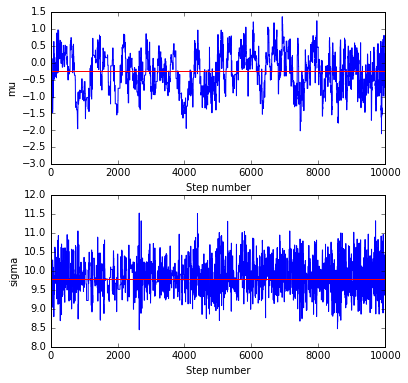

In [8]:
display = DisplayResults(S, burnin=S.N//2, names=['mu', 'sigma'])
#display.show_labels = False
display.chains()

In [9]:
#display.distributions()

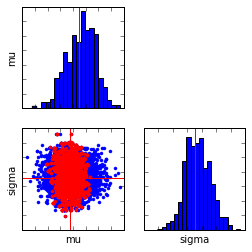

In [10]:
display.corner()

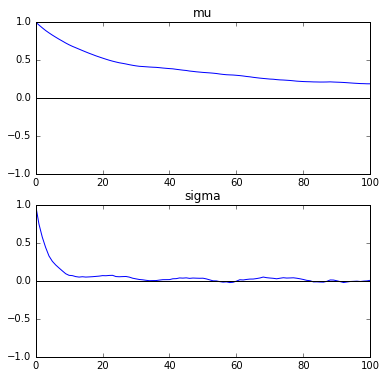

In [11]:
display.autocorrelations()

In [12]:
#display.normalised = True
#display.chains()

In [13]:
#display.distributions()